<a href="https://maestriasydiplomados.tec.mx/posgrados/maestria-en-inteligencia-artificial-aplicada"><img src="logo_MR4010.png"></a>
<h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Regresión Lineal Múltiple
### Se hace uso del data de USA Housing disponible en Kaggle para mostrar los distintos aspectos del método de regresión lineal
### https://www.kaggle.com/datasets/gopalchettri/usa-housing

# Se cargan las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Se carga el dataset y se inspecciona

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Se verifica que no haya columnas incompletas 

In [7]:
print(USAhousing.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


# Se verifica qué columnas están más correlacionadas con ambos signos

In [8]:
corr = USAhousing.corr()
print(corr)

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

# Se toman en cuenta todas las columnas para llevar a cabo el entrenamiento
# *X* representa las *features* e *y* representa las *labels*

In [9]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

# Se divide el dataset para entrenamiento y prueba
### Se toma el 30% del dataset para probar el modelo

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

(3500, 5)
(3500,)


In [13]:
print(X_test.shape)
print(y_test.shape)

(1500, 5)
(1500,)


# Se crea el modelo y se entrena

In [14]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

# Se imprimen los coeficientes y la intercepción del modelo

In [15]:
print(linear_model.intercept_)

-2638673.4261902785


In [16]:
print(linear_model.coef_)

[2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]


# Predicciones con el modelo

In [17]:
predictions = linear_model.predict(X_test)

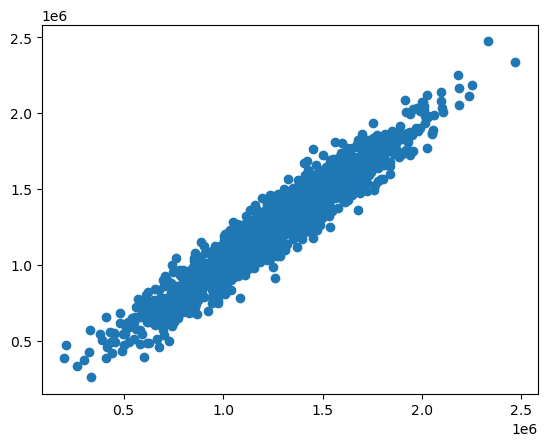

In [18]:
# se comparan las predicciones con las target de prueba
plt.scatter(y_test,predictions)

# Métricas de Evaluación
### El objetivo es minimizar estas métricas

**Mean Absolute Error** (MAE)

$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$

**Mean Squared Error** (MSE)

$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$

**Root Mean Squared Error** (RMSE)

$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

In [19]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81135.5660933687
MSE: 10068422551.400827
RMSE: 100341.5295448541


# Gracias por la atención